In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats

In [30]:
test = pd.read_csv("../data/drugcell_test.txt", sep="\t", header=None, names=(['cell', 'drug', 't_auc']))
test_comp = pd.read_csv("../data/drugcell_test_compare.txt", sep="\t", header=None, names=(['cell', 'drug', 't_auc']))

predicted = pd.read_csv("../result/drugcell_cv.predict", header=None, names=(['p_auc']))
predicted_orig = pd.read_csv("../result/drugcell_orig_cv.predict", header=None, names=(['p_auc']))
predicted_ann_1 = pd.read_csv("../result/drugcell_1.predict", header=None, names=(['p_auc']))
predicted_ann_2 = pd.read_csv("../result/drugcell_2.predict", header=None, names=(['p_auc']))
elastic_net = pd.read_csv("../result/elastic_net.predict", header=None, names=(['p_auc']))

predicted_comp = pd.read_csv("../result/drugcell_comp.predict", header=None, names=(['p_auc']))
predicted_orig_comp = pd.read_csv("../result/drugcell_orig_comp.predict", header=None, names=(['p_auc']))
predicted_ann_1_comp = pd.read_csv("../result/drugcell_1_comp.predict", header=None, names=(['p_auc']))
predicted_ann_2_comp = pd.read_csv("../result/drugcell_2_comp.predict", header=None, names=(['p_auc']))
predicted_ann_3_comp = pd.read_csv("../result/drugcell_3_comp.predict", header=None, names=(['p_auc']))
elastic_net_comp = pd.read_csv("../result/elastic_net_comp.predict", header=None, names=(['p_auc']))

In [3]:
def get_boxplot(test, predicted, x_title, y_title):
    
    df = pd.DataFrame(list(zip(test['t_auc'], predicted['p_auc'])), columns=['t', 'p'])
    df = df.sort_values(by=['t'])

    data = []
    for i in range(9):
        temp = []
        data.append(temp)

    for i, row in df.iterrows():
        if row['t'] < 0.3:
            data[0].append(row['p'])
        elif row['t'] < 0.4:
            data[1].append(row['p'])
        elif row['t'] < 0.5:
            data[2].append(row['p'])
        elif row['t'] < 0.6:
            data[3].append(row['p'])
        elif row['t'] < 0.7:
            data[4].append(row['p'])
        elif row['t'] < 0.8:
            data[5].append(row['p'])
        elif row['t'] < 0.9:
            data[6].append(row['p'])
        elif row['t'] < 1.0:
            data[7].append(row['p'])
        else:
            data[8].append(row['p'])
    
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data, showfliers=False, labels=['0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0', 'Inf'])
    ax.grid()
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    #ax.xaxis.label.set_color('red')
    #ax.yaxis.label.set_color('red')
    #ax.tick_params(axis='x', colors='red')
    #ax.tick_params(axis='y', colors='red')
    
    plt.show()


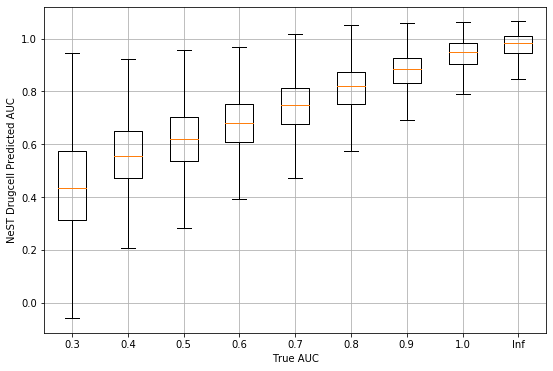

In [5]:
#NeST Drugcell

get_boxplot(test, predicted, "True AUC", "NeST Drugcell Predicted AUC")

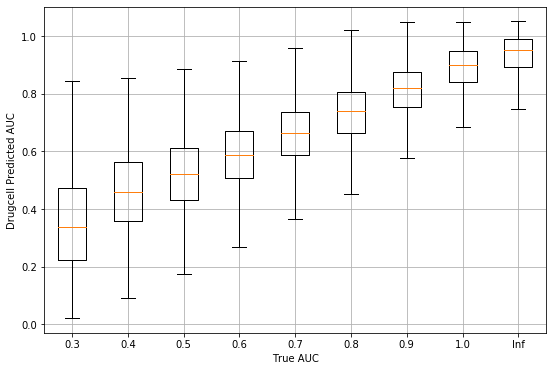

In [6]:
#Drugcell

get_boxplot(test, predicted_orig, "True AUC", "Drugcell Predicted AUC")

In [7]:
def load_mapping(mapping_file):
    mapping = {}
    file_handle = open(mapping_file)
    for line in file_handle:
        line = line.rstrip().split()
        mapping[line[1]] = int(line[0])
    file_handle.close()
    return mapping


def load_test_data(file_name, cell2id, drug2id):
    feature = []
    label = []
    with open(file_name, 'r') as fi:
        for line in fi:
            tokens = line.strip().split('\t')
            feature.append([cell2id[tokens[0]], drug2id[tokens[1]]])
            label.append([float(tokens[2])])
    return feature, label


def pearson_corr(x, y):
    xx = x - np.mean(x)
    yy = y - np.mean(y)
    return np.sum(xx*yy) / (np.linalg.norm(xx, 2) * np.linalg.norm(yy, 2))



In [8]:
cell_id_mapping = load_mapping('../data/cell2ind.txt')
drug_id_mapping = load_mapping('../data/drug2ind.txt')

test_feature, test_label = load_test_data("../data/drugcell_test.txt", cell_id_mapping, drug_id_mapping)
test_comp_feature, test_comp_label = load_test_data("../data/drugcell_test_compare.txt", cell_id_mapping, drug_id_mapping)

In [23]:
def compare_corr(drugs, features, x_label, y_label, x_title, y_title, size):
    X_corr = []
    Y_corr = []
    
    for drug in drugs:
        test_vals = []
        Y_vals = []
        X_vals = []
        for i, feature in enumerate(features):
            if feature[1] == drug:
                test_vals.append(test_label[i])
                Y_vals.append(y_label[i])
                X_vals.append(x_label[i])
        Y_c = stats.spearmanr(np.array(Y_vals), np.array(test_vals))[0]
        X_c = stats.spearmanr(np.array(X_vals), np.array(test_vals))[0]
        Y_corr.append(Y_c)
        X_corr.append(X_c)

    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111)
    ax.scatter(X_corr, Y_corr, s = size)

    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    #ax.xaxis.label.set_color('red')
    #ax.yaxis.label.set_color('red')
    #ax.tick_params(axis='x', colors='red')
    #ax.tick_params(axis='y', colors='red')

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    plt.show()

NeST DrugCell Correlation: 0.8059636882180176
DrugCell Correlation: 0.7992168334210353


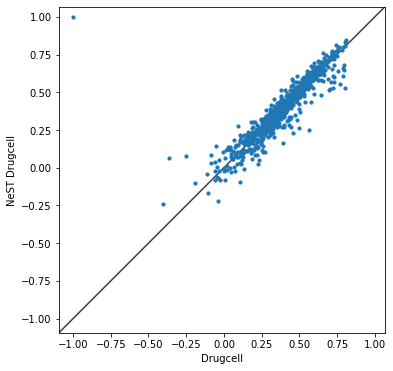

In [48]:
size = 10
drug_ids = set([d[1] for d in test_feature])

predicted_label = np.array(predicted)
pred_corr = pearson_corr(predicted_label, test_label)
print("NeST DrugCell Correlation: " + str(pred_corr))

predicted_orig_label = np.array(predicted_orig)

pred_orig_corr = pearson_corr(predicted_orig_label, test_label)
print("DrugCell Correlation: " + str(pred_orig_corr))

compare_corr(drug_ids, test_feature, predicted_orig_label, predicted_label, "Drugcell", "NeST Drugcell", size)

In [58]:
sp = stats.spearmanr(predicted_label, test_label)[0]
sp
sp = stats.spearmanr(predicted_orig_label, test_label)[0]
sp

0.7625927771402776

ANN Corr:0.811680407384576


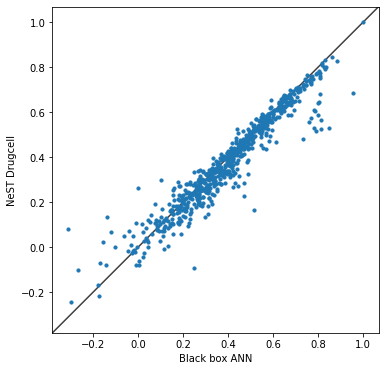

In [49]:
predicted_ann_label = (np.array(predicted_ann_1) + np.array(predicted_ann_2))/2.0

ann_corr = pearson_corr(predicted_ann_label, test_label)
print("ANN Corr:" + str(ann_corr))

compare_corr(drug_ids, test_feature, predicted_ann_label, predicted_label, "Black box ANN", "NeST Drugcell", size)

ElasticNet Correlation: 0.041209875640382414


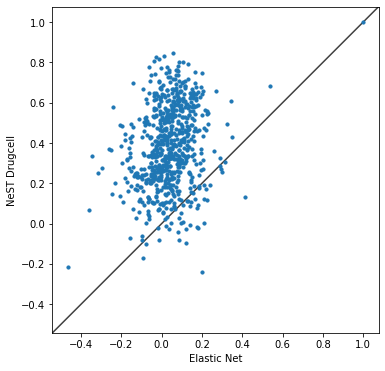

In [50]:
elastic_net_label = np.array(elastic_net)
corr = pearson_corr(elastic_net_label, test_label)
print("ElasticNet Correlation: " + str(corr))

compare_corr(drug_ids, test_feature, elastic_net_label, predicted_label, "Elastic Net", "NeST Drugcell", size)

NeST DrugCell Correlation: 0.38055061413996916
DrugCell Correlation: 0.3811268656297834


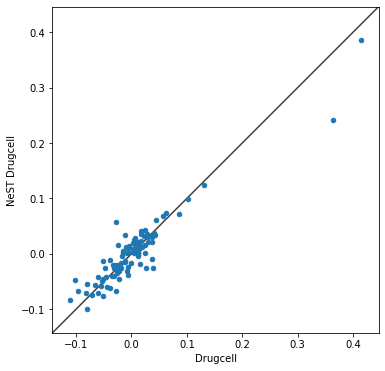

In [26]:
size = 20
drug_ids_comp = set([d[1] for d in test_comp_feature])

predicted_comp_label = np.array(predicted_comp)
pred_corr = pearson_corr(predicted_comp_label, test_comp_label)
print("NeST DrugCell Correlation: " + str(pred_corr))

predicted_orig_comp_label = np.array(predicted_orig_comp)

pred_orig_corr = pearson_corr(predicted_orig_comp_label, test_comp_label)
print("DrugCell Correlation: " + str(pred_orig_corr))

compare_corr(drug_ids_comp, test_comp_feature, predicted_orig_comp_label, predicted_comp_label, "Drugcell", "NeST Drugcell", size)

ANN Corr:0.4054879950358775


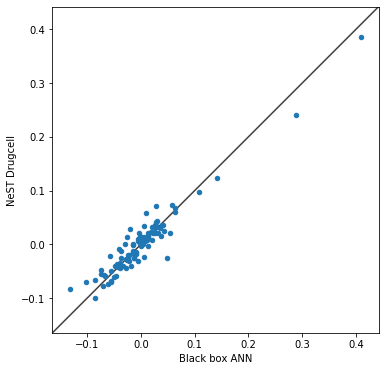

In [41]:
predicted_ann_comp_label = (np.array(predicted_ann_1_comp) + np.array(predicted_ann_2_comp) + np.array(predicted_ann_3_comp))/3.0

ann_corr = pearson_corr(predicted_ann_comp_label, test_comp_label)
print("ANN Corr:" + str(ann_corr))

compare_corr(drug_ids_comp, test_comp_feature, predicted_ann_comp_label, predicted_comp_label, "Black box ANN", "NeST Drugcell", size)

ElasticNet Correlation: 0.04094256655571029


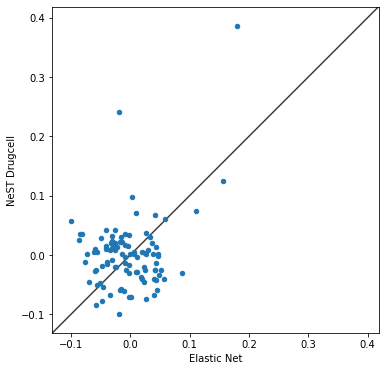

In [46]:
elastic_net_comp_label = np.array(elastic_net_comp)
corr = pearson_corr(elastic_net_comp_label, test_comp_label)
print("ElasticNet Correlation: " + str(corr))

compare_corr(drug_ids_comp, test_comp_feature, elastic_net_comp_label, predicted_comp_label, "Elastic Net", "NeST Drugcell", size)

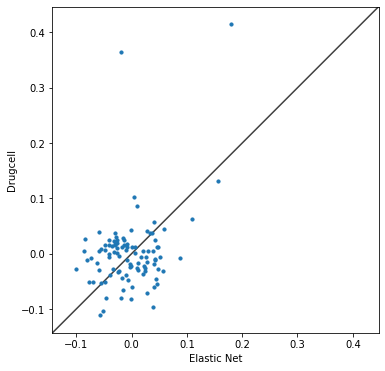

In [56]:
compare_corr(drug_ids_comp, test_comp_feature, elastic_net_comp_label, predicted_orig_comp_label, "Elastic Net", "Drugcell", size)